In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import seaborn as sns
import time

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_500','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Warszawa,Wola,mazowieckie,52.245982,20.985385,wtorny,36.00,2,parter,3,1956.0,496000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,13777.777778,490
1,Kraków,Swoszowice,małopolskie,49.991389,19.946389,wtorny,78.32,3,3,3,2014.0,538000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,6869.254341,394
2,Łódź,Śródmieście,łódzkie,51.772914,19.458331,wtorny,60.27,2,2,3,1910.0,270000.0,https://gratka.pl/nieruchomosci/mieszkanie-lod...,4479.840717,152
3,Warszawa,Stara Ochota,mazowieckie,52.218900,20.978800,wtorny,122.00,4,6,7,2020.0,1955000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,16024.590164,215
4,Kraków,Mistrzejowice,małopolskie,50.096196,20.009887,wtorny,48.07,3,3,4,1978.0,384000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,7988.350322,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,Warszawa,Wola,mazowieckie,52.237222,20.960556,pierwotny,109.00,4,12,13,2020.0,1460000.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,13394.495413,159
54463,Warszawa,Wola,mazowieckie,52.237222,20.960556,wtorny,82.60,4,4,5,2020.0,885000.0,https://gratka.pl/nieruchomosci/4-pokojowe-got...,10714.285714,159
54464,Poznań,Grunwald,wielkopolskie,52.392626,16.846137,wtorny,68.25,3,parter,4,2009.0,540000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7912.087912,197
54465,Kraków,Os. Prądnik Czerwony,małopolskie,50.088513,19.958912,wtorny,45.00,2,2,10,2019.0,610000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,13555.555556,468


## data preparation

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            54467 non-null  object 
 1   district        54467 non-null  object 
 2   voivodeship     46557 non-null  object 
 3   localization_y  54467 non-null  float64
 4   localization_x  54467 non-null  float64
 5   market          54467 non-null  object 
 6   area            54467 non-null  float64
 7   rooms           54467 non-null  object 
 8   floor           54467 non-null  object 
 9   floors          54467 non-null  object 
 10  build_yr        54467 non-null  float64
 11  price           54467 non-null  float64
 12  url             54467 non-null  object 
 13  price_of_sqm    54467 non-null  float64
 14  cluster         54467 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 6.0+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','area','price','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market        54467 non-null  object 
 1   rooms         54467 non-null  object 
 2   floor         54467 non-null  object 
 3   floors        54467 non-null  object 
 4   build_yr      54467 non-null  float64
 5   price_of_sqm  54467 non-null  float64
 6   cluster       54467 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.9+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,build_yr,price_of_sqm,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,1956.0,13777.777778,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014.0,6869.254341,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1910.0,4479.840717,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020.0,16024.590164,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1978.0,7988.350322,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,2020.0,13394.495413,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54463,2020.0,10714.285714,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54464,2009.0,7912.087912,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54465,2019.0,13555.555556,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame.price_of_sqm.values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## random forest regressor and grid search

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [14]:
parameters = [{'n_estimators':[10,50,100,200,300,500]}]

In [15]:
grid_search = GridSearchCV(estimator = RandomForestRegressor(),
                           param_grid = parameters,
                           cv = 3,
#                            n_jobs = -1,
                          )

In [16]:
start = time.time()

grid_search = grid_search.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 224.0 min.


In [17]:
grid_search.best_score_

0.7689251549693238

In [18]:
grid_search.best_params_

{'n_estimators': 500}

In [19]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,32.393955,0.588124,0.099345,0.005063,10,{'n_estimators': 10},0.752230,0.754340,0.745745,0.750771,0.003657,6
1,161.451343,6.245779,0.363131,0.022871,50,{'n_estimators': 50},0.770937,0.769095,0.758539,0.766190,0.005462,5
2,304.412660,14.196940,0.689355,0.066076,100,{'n_estimators': 100},0.769255,0.772659,0.762649,0.768188,0.004156,4
3,596.221690,12.368342,1.259632,0.134291,200,{'n_estimators': 200},0.771425,0.772106,0.762268,0.768600,0.004486,3
4,962.847381,33.481167,2.311556,0.258356,300,{'n_estimators': 300},0.771917,0.773124,0.761672,0.768904,0.005138,2
5,1553.833432,48.939049,3.568674,0.104154,500,{'n_estimators': 500},0.771598,0.773143,0.762035,0.768925,0.004913,1


In [20]:
start = time.time()

model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 9.0 min.


## model evaluation

In [21]:
from sklearn.metrics import r2_score

In [22]:
predictions = model.predict(X_test)

In [23]:
r2_score(y_test,predictions)

0.7860137474771387

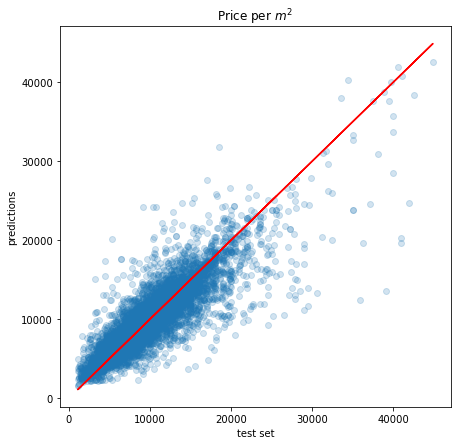

In [24]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(x=y_test,y=predictions,edgecolor=None,alpha=0.2)
plt.xlabel('test set')
plt.ylabel('predictions')
plt.title('Price per $m^{2}$')

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [25]:
predictions

array([ 6002.13236382,  7379.13940843, 10968.7872127 , ...,
       12328.8925606 , 14434.56294866, 22366.57236602])

In [26]:
predictions[:20]/y_test[:20]

array([1.44075185, 0.59984917, 1.00984769, 1.03076091, 0.82677099,
       1.05552845, 0.89458944, 1.99308542, 1.00679499, 1.23505459,
       1.02755372, 0.9234481 , 1.21437108, 0.93475484, 1.16523927,
       0.94068143, 1.05858284, 0.99224115, 0.7407498 , 1.21586712])

## k-Fold Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score

In [29]:
start = time.time()

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 77.0 min.


In [30]:
accuracies.mean()

0.781353904100096

In [31]:
accuracies.std()

0.019592481499492418

In [32]:
accuracies

array([0.79801236, 0.80024185, 0.75752367, 0.80788848, 0.75795516,
       0.79125615, 0.8030395 , 0.77394241, 0.76164754, 0.76203193])

## saving data

In [33]:
import joblib
joblib.dump(model, 'random_forest_model')

['random_forest_model']